In [69]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt
import math

def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

**Quantization**

In [70]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    
    QC50 = np.array([[17,18,24,47,99,99,99,99],
                     [18,21,26,66,99,99,99,99],
                     [24,26,56,99,99,99,99,99],
                     [47,66,99,99,99,99,99,99],
                     [99,99,99,99,99,99,99,99],
                     [99,99,99,99,99,99,99,99],
                     [99,99,99,99,99,99,99,99],
                     [99,99,99,99,99,99,99,99]])

    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    elif qName == "QC50":
        return QC50
    
    else:
        return np.ones((8,8))

**The Original Image**
> I called showImage function, which is defined above.
> You can choose between those 4 images which are located in input folder by changing the directory variable.

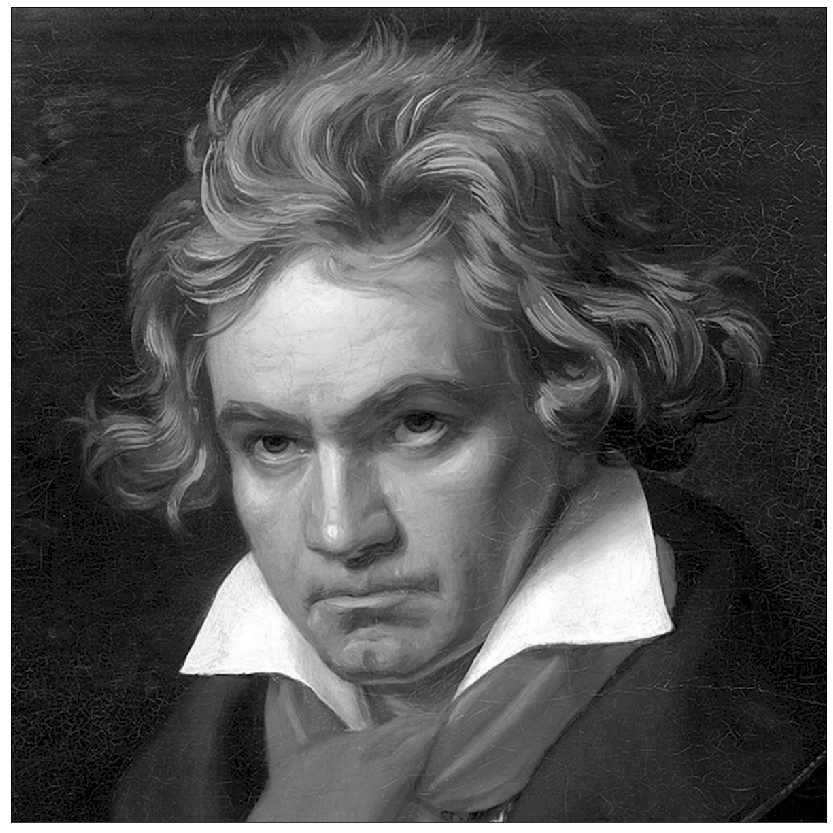

In [71]:
directory = 'beeth.png'
img = cv2.imread(directory,0)
showImage(img)

In [72]:
from PIL import Image, ImageDraw
BMPImage= Image.open(r"beeth.png")

print("Image Size'")
print(BMPImage.size)

pixel = list(BMPImage.getdata())
Size = BMPImage.size[0]*BMPImage.size[1]
print(Size)
Y = []
Cb = []
Cr = []
for i in pixel:
    
    ## Y Equation
    Y.append(math.trunc((0.257 * i[0]) + (0.504 * i[1]) + (0.098 * i[2]) + 16))
    ##Cb Equation
    Cb.append(math.trunc(((-0.148) * i[0]) - (0.291 * i[1]) + (0.439 * i[2]) + 128))
    ## Cr Equantion
    Cr.append(math.trunc((0.439 * i[0]) - (0.368 * i[1]) - (0.071 * i[2]) + 128))

Y = np.array(Y).reshape(BMPImage.size[0], BMPImage.size[1])
Cb = np.array(Cb).reshape(BMPImage.size[0], BMPImage.size[1])
Cr = np.array(Cr).reshape(BMPImage.size[0], BMPImage.size[1])

Image Size'
(1200, 1200)
1440000


In [73]:
img  = Cb

**Block Splitting**
>  Block splitting is one of the processes that splice the image into smaller blocks of 8×8 or a 16×16 dimension.

In [74]:
height  = len(img)
width = len(img[0])
sliced = []
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

The image heigh is 1200, and image width is 1200 pixels


**Dividing into parts And Normalization**
>  [0,255] To [-128,127].

> This step is to reduces the dynamic range requirements (For DCT processing)

In [75]:
img[:8,:8]

array([[122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122],
       [122, 122, 122, 122, 122, 122, 122, 122]])

In [76]:
currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(img[currY:i,currX:j]-np.ones((8,8))*128)
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")


Size of the sliced image: 22500
Each elemend of sliced list contains a (8, 8) element.


In [77]:
imf = [np.float32(img) for img in sliced]

In [78]:
imf[0]

array([[-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.],
       [-6., -6., -6., -6., -6., -6., -6., -6.]], dtype=float32)

**Discrete Cosine Transform**

In [79]:
DCToutput = []
for part in imf:
    currDCT = cv2.dct(part)
    DCToutput.append(currDCT)


In [80]:
DCToutput[0][0][0],DCToutput[0][-1][-1]

(-48.0, 0.0)

> Notice that most of the higher-frequency elements of the sub-block (i.e., those with an x or y spatial frequency greater than 4) are compressed into zero values.

>Q. Matrix: "Q10", "Q50" and "Q90". 

In [81]:
DCToutput[0]

array([[-48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]], dtype=float32)

In [82]:
QMatrix = selectQMatrix("QC50")
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/QMatrix[i,j])
DCToutput[0][0]

array([-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [83]:
DCToutput[0]

array([[-3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

**Inverse Discrete Cosine Transform**

In [84]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
      dtype=float32)

In [85]:
invList[0]

array([[-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375],
       [-0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375, -0.375]],
      dtype=float32)

In [86]:
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))

**Results**
> As you can see the image lost some high frequency components and it causes reduced size on disk.
There is no change in total pixel count, the JPEG did not reduce the size of the image, it just cancelled out high frequencies.

In [94]:
r = [[0 for x in range(res.shape[0])] for x in range(res.shape[1])]
g = [[0 for x in range(res.shape[0])] for x in range(res.shape[1])]
b = [[0 for x in range(res.shape[0])] for x in range(res.shape[1])]
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        r[i][j]   =   1.0 * Y[i][j]    + 0 * Cb[i][j]    + 1.402 * Cr[i][j]
        g[i][j]   =   1.0 * Y[i][j]    - 0.344136 * Cb[i][j] - 0.714136 * Cr[i][j]
        b[i][j]   =   1.0 * Y[i][j]    + 1.772 * Cb[i][j]    + 0 * Cr[i][j]


In [95]:
r = np.array(r)
g = np.array(g)
b = np.array(b)

In [98]:
rgb_img = cv2.merge([b,g,r])     # switch it to rgb

plt.imshow(rgb_img)
# plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
# plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'g'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


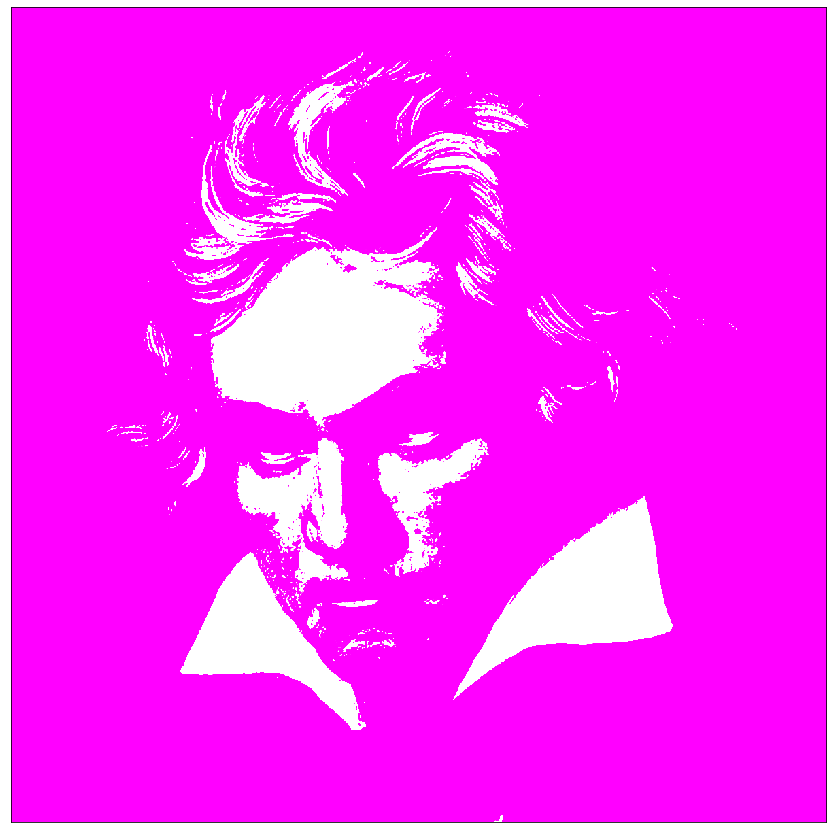

In [97]:
showImage(rgb_img)

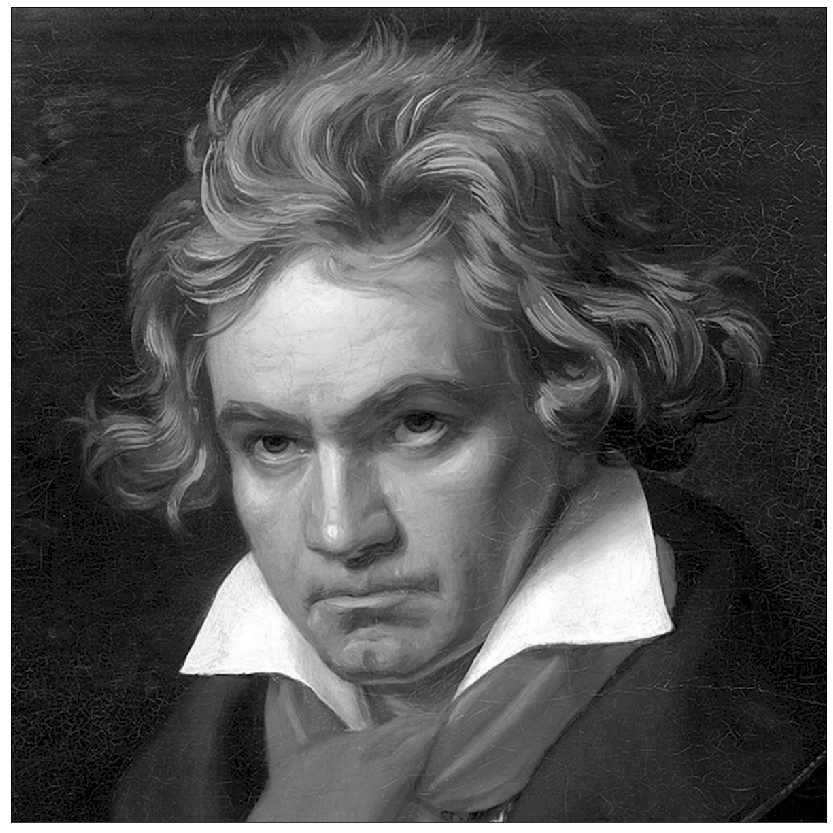

In [55]:
showImage(img)

In [139]:
def psnr(compressed_image,origin_image):
    compressed = np.array(compressed_image)
    origin = np.array(origin_image)
    mse = 0
    for rownum in range(len(compressed)):
        for colnum in range(len(compressed[rownum])):
            mse += math.pow((origin[rownum][colnum] - compressed[rownum][colnum]),2)
    
    mse = mse/(len(origin)*len(origin[0]))
    res = 10 * math.log10(math.pow(255,2)/mse)
    return res

In [140]:
res_db = psnr(res, img)
print("PSNR is %d db" % res_db)

PSNR is 8 db
